1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


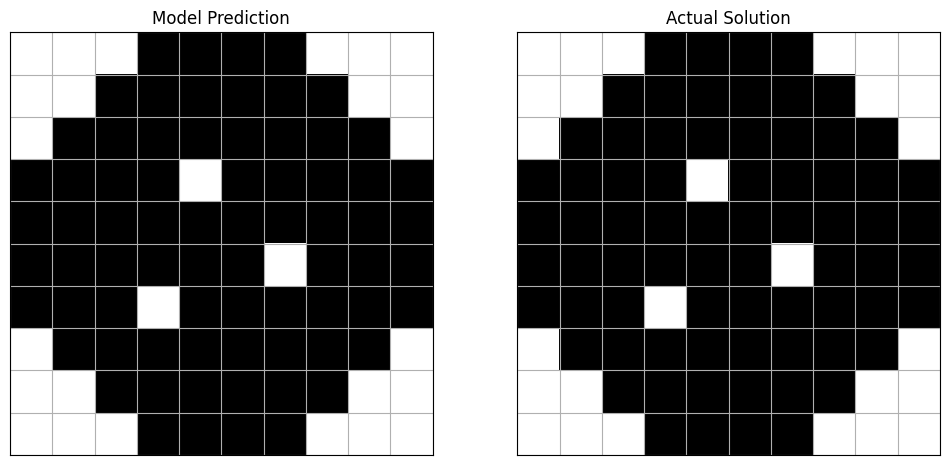

Puzzle solving accuracy: 1.00


In [137]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import json
import time
import random
import matplotlib.pyplot as plt

# Define model paths for different sizes
model_paths = {
    '5x5': '5x5_nonogram_model.keras',
    '10x10': '10x10_nonogram_model.keras'
}

def pick_random_puzzle(size='5x5'):
    """Selects a random puzzle from a JSON file based on the size."""
    with open(f'data/{size}.json', 'r') as file:
        random.seed(time.time())
        file_data = json.load(file)
        puzzle = random.choice(file_data)
        return puzzle

def test_model_on_puzzle(model, puzzle_data, size='5x5'):
    """Tests the model on a given puzzle and visualizes the result based on the size."""
    if size == '5x5':
        # Preprocess the 5x5 puzzle data
        combined = np.array(puzzle_data['combined']).reshape(10, 5)
        combined = combined / np.max(combined)
        X = combined[np.newaxis, :, :, np.newaxis]  # Shape: (1, 10, 5, 1)
        
        # Make prediction using the model
        prediction = model.predict(X)[0]
        prediction = (prediction > 0.5).astype(int)
        
        # Get actual solution from puzzle data
        solution = np.array(puzzle_data['solution']).reshape(5, 5)
    
    elif size == '10x10':
        # Preprocess the 10x10 puzzle data
        combined = np.array(puzzle_data['combined']).reshape(20, 10)
        combined = combined / np.max(combined)
        X = combined[np.newaxis, :, :, np.newaxis]  # Shape: (1, 20, 10, 1)
        
        # Make prediction using the model
        prediction = model.predict(X)[0]
        prediction = (prediction > 0.5).astype(int)
        
        # Get actual solution from puzzle data
        solution = np.array(puzzle_data['solution']).reshape(10, 10)
    
    else:
        raise ValueError("Unsupported nonogram size. Please use '5x5' or '10x10'.")

    # Visualize the model's prediction and actual solution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    ax1.imshow(prediction, cmap='binary', vmin=0, vmax=1)
    ax1.set_title('Model Prediction')
    ax1.grid(True)
    ax1.set_xticks(np.arange(-0.5, prediction.shape[1], 1))
    ax1.set_yticks(np.arange(-0.5, prediction.shape[0], 1))
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.tick_params(length=0)
    
    ax2.imshow(solution, cmap='binary', vmin=0, vmax=1)
    ax2.set_title('Actual Solution')
    ax2.grid(True)
    ax2.set_xticks(np.arange(-0.5, solution.shape[1], 1))
    ax2.set_yticks(np.arange(-0.5, solution.shape[0], 1))
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])
    ax2.tick_params(length=0)
    
    plt.show()
    
    # Calculate and print the accuracy
    accuracy = np.mean(prediction == solution)
    print(f"Puzzle solving accuracy: {accuracy:.2f}")

if __name__ == "__main__":
    size = '10x10'  # Change this to '5x5' if needed
    
    # Load the Keras model for the specified size
    model = load_model(model_paths[size])
    
    # Pick a random puzzle for the specified size
    puzzle = pick_random_puzzle(size=size)
    
    # Test the model on the puzzle and visualize the results
    test_model_on_puzzle(model, puzzle, size=size)
